In [ ]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
news=pd.read_csv('/content/drive/MyDrive/news.csv')

In [ ]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
news.groupby('label').describe()

Unnamed: 0                                                              \
           count         mean          std     min      25%     50%      75%   
label                                                                          
FAKE      3164.0  7912.297092  1514.701524  5280.0  6627.75  7904.0  9231.25   
REAL      3171.0  2654.344056  1531.720152     2.0  1317.50  2676.0  3992.50   

                
           max  
label           
FAKE   10557.0  
REAL    5276.0

In [ ]:
# data distributation
news.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
# Creat a new column of label which is actully is numeric
news['Fake']=news['label'].apply(lambda x : 1 if x=='FAKE' else 0)

In [ ]:
news1=news.copy()

In [ ]:
# remove some columns which is not use in model building
news1.drop(['Unnamed: 0','label'], axis=1,inplace=True)

In [ ]:
news1.head()

,title,text,Fake
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [ ]:
# create a new corpus column which have both title and text 's information
news1['news']= news1['title']+ '\n' +news1['text']


In [ ]:
news1.head()

,title,text,Fake,news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,You Can Smell Hillary’s Fear\nDaniel Greenfiel...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,Kerry to go to Paris in gesture of sympathy\nU...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,The Battle of New York: Why This Primary Matte...


In [ ]:
print(news1['news'][0])

You Can Smell Hillary’s Fear
Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is bein

In [ ]:
X=news1['news']

In [ ]:
Y=news1.Fake

In [ ]:
Y,X

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6330    0
 6331    1
 6332    1
 6333    0
 6334    0
 Name: Fake, Length: 6335, dtype: int64,
 0       You Can Smell Hillary’s Fear\nDaniel Greenfiel...
 1       Watch The Exact Moment Paul Ryan Committed Pol...
 2       Kerry to go to Paris in gesture of sympathy\nU...
 3       Bernie supporters on Twitter erupt in anger ag...
 4       The Battle of New York: Why This Primary Matte...
                               ...                        
 6330    State Department says it can't find emails fro...
 6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
 6332    Anti-Trump Protesters Are Tools of the Oligarc...
 6333    In Ethiopia, Obama seeks progress on peace, se...
 6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
 Name: news, Length: 6335, dtype: object)

In [ ]:
# split into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,stratify=Y)

In [ ]:
x_train.shape

(4244,)

In [ ]:
y_train.shape

(4244,)

In [ ]:
pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully 

In [ ]:
# import some tensorflow and keras and some their class
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow.keras.layers import Dense,Input,Dropout

In [ ]:
# download the bert model from hub
preprocess=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3")
encoder=hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4")

In [ ]:
# Bert Layers input and output
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string)

In [ ]:
bert_preprocess=preprocess(text_input)
outputs=encoder(bert_preprocess)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# Artificial functial neural network layer
l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
l=tf.keras.layers.Dense(10,activation='relu')(l)
l=tf.keras.layers.Dense(1,activation='sigmoid')(l)

In [ ]:
# Actual model
model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [ ]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(patience=10)

In [ ]:
# fit the model
#model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),callbacks=es)

In [ ]:
model_history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),callbacks=es)

Epoch 1/20
133/133 [==============================] - 89s 673ms/step - loss: 0.5455 - accuracy: 0.7321 - val_loss: 0.5488 - val_accuracy: 0.7298
Epoch 2/20
133/133 [==============================] - 90s 677ms/step - loss: 0.5497 - accuracy: 0.7297 - val_loss: 0.5494 - val_accuracy: 0.7303
Epoch 3/20
133/133 [==============================] - 72s 544ms/step - loss: 0.5409 - accuracy: 0.7352 - val_loss: 0.5329 - val_accuracy: 0.7489
Epoch 4/20
133/133 [==============================] - 89s 673ms/step - loss: 0.5342 - accuracy: 0.7380 - val_loss: 0.5313 - val_accuracy: 0.7470
Epoch 5/20
133/133 [==============================] - 90s 679ms/step - loss: 0.5338 - accuracy: 0.7375 - val_loss: 0.5234 - val_accuracy: 0.7580
Epoch 6/20
133/133 [==============================] - 90s 678ms/step - loss: 0.5250 - accuracy: 0.7512 - val_loss: 0.5306 - val_accuracy: 0.7456
Epoch 7/20
133/133 [==============================] - 72s 545ms/step - loss: 0.5283 - accuracy: 0.7375 - val_loss: 0.5365 - val_ac

In [ ]:
model_history.history['accuracy']

[0.5742224454879761,
 0.7009896039962769,
 0.7379830479621887,
 0.7601319551467896,
 0.778746485710144,
 0.7947691082954407,
 0.7848727703094482,
 0.7968897223472595,
 0.8018378615379333,
 0.8008953928947449]

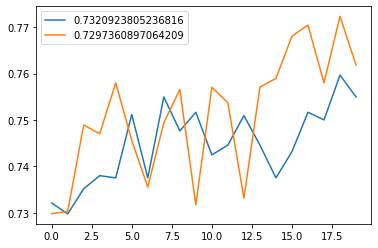

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(model_history.history['accuracy'])

In [ ]:
y_pred=model.predict(x_test)

66/66 [==============================] - 28s 417ms/step


In [ ]:
y_pred=y_pred.flatten()

In [ ]:
y_predicted=np.where(y_pred > 0.5, 1,0)

In [ ]:
y_predicted[:5]

array([1, 0, 1, 0, 1])

In [ ]:
y_test[:5]

5344    1
6009    0
5255    0
396     0
2429    1
Name: Fake, dtype: int64

In [ ]:
# classification report
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_predicted)

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73      1047
           1       0.71      0.87      0.79      1044

    accuracy                           0.76      2091
   macro avg       0.78      0.76      0.76      2091
weighted avg       0.78      0.76      0.76      2091



Text(33.0, 0.5, 'Actual')

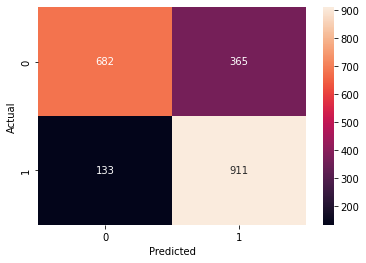

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Save model
model.save('model.h5')

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import load_model


In [ ]:
# from tensorflow.keras.models import load_model
# n=load_model('/content/model.h5')

In [ ]:
my_reloaded_model = tf.keras.models.load_model(
       ('/content/model.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
my_reloaded_model.evaluate(x_test,y_test)

66/66 [==============================] - 23s 334ms/step - loss: 0.4131 - accuracy: 0.8441


[0.4130910038948059, 0.8440937399864197]